In [1]:
import numpy as np
import matplotlib.pyplot as plt

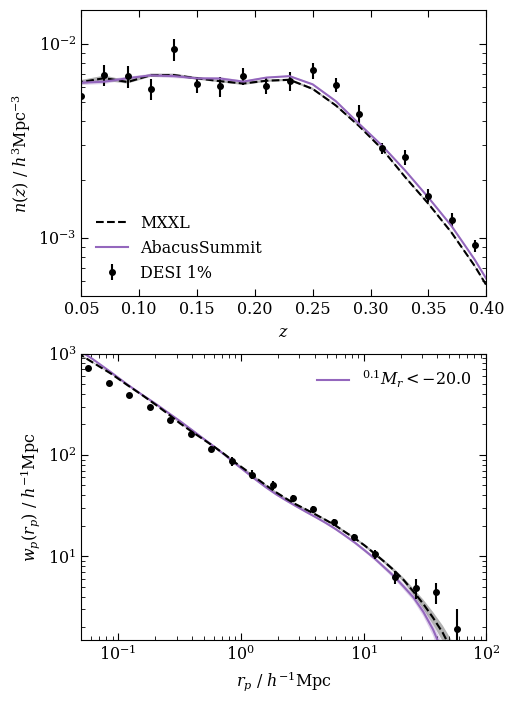

In [3]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

f, ax = plt.subplots(2,1, figsize=(5,7)) 
plt.subplots_adjust(top = 0.98, bottom = 0.08, right = 0.95, left = 0.14)

for i in range(2):
    ax[i].tick_params(direction="in", top=True, right=True, length=5, labelsize=11.5)
    ax[i].tick_params(which='minor', direction="in", top=True, right=True, length=3, labelsize=11.5)

### number densities in upper panel
z, n, err = np.loadtxt('data/Mr_-20.0/num_den_-20_desi.txt', unpack=True)
ax[0].errorbar(z, n, yerr=err, fmt='o', ms=4, c="k", label="DESI 1%")
    
z, n, err = np.loadtxt('data/Mr_-20.0/num_den_-20_mxxl.txt', unpack=True)
ax[0].plot(z, n, c="k", ls="--", label="MXXL")
ax[0].fill_between(z, n-err, n+err, alpha=0.3, facecolor="k")
 
z, n, err = np.loadtxt('data/Mr_-20.0/num_den_-20_abacus.txt', unpack=True)
ax[0].plot(z, n, c="C4", ls="-", label="AbacusSummit")
ax[0].fill_between(z, n-err, n+err, alpha=0.3, facecolor="C4")
 
    
### clustering in lower panel
rp, wp, err = np.loadtxt('data/Mr_-20.0/xi_r_-20_abacus.txt', unpack=True)
ax[1].plot(rp, wp, c="C4")
ax[1].fill_between(rp, wp+err, wp-err, facecolor="C4", alpha=0.3)

rp, wp, err = np.loadtxt('data/Mr_-20.0/xi_r_-20_mxxl.txt', unpack=True)
ax[1].plot(rp, wp, c="k", ls="--")
ax[1].fill_between(rp, wp+err, wp-err, facecolor="k", alpha=0.3)

rp, wp, err = np.loadtxt('data/Mr_-20.0/xi_r_-20_desi.txt', unpack=True)
ax[1].errorbar(rp, wp, yerr=err, fmt='o', ms=4, color='k')

ax[0].legend(loc='lower left', fontsize=11.5).draw_frame(False)  
ax[1].plot([],[],label="$^{0.1}M_r < -20.0$", c="C4")
ax[1].legend(loc='upper right', fontsize=11.5).draw_frame(False) 

# set axis limits and labels
ax[0].set_yscale("log")
ax[0].set_ylim(5e-4, 1.5e-2)
ax[0].set_xlim(0.05,0.4)
ax[0].set_xlabel(r'$z$', fontsize=11.5)
ax[0].set_ylabel(r'$n(z) \ / \ h^3 \mathrm{Mpc}^{-3}$', fontsize=11.5)

ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlim(5e-2, 1e2)
ax[1].set_ylim(1.5, 1e3)
ax[1].set_ylabel(r"$w_p(r_p) \ / \ h^{-1}\mathrm{Mpc}$", fontsize=11.5)
ax[1].set_xlabel(r"$r_p \ / \ h^{-1}\mathrm{Mpc}$", fontsize=11.5)

# save the figure as a pdf
plt.savefig("pdf/Figure_9.pdf", dpi=300)